In [1]:
!pip install --upgrade git+https://github.com/GeoBigData/sensortools.git@master -q

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from gbdxtools import Interface
gbdx = Interface()

# DG Sensor Tools
from sensortools import sensortools
st = sensortools()

# Inputs

In [3]:
# GB of data equates to how many square kilometers of imagery?
gb = 100

# Square kilometers of imagery equates to how many GB of data?
km2 = 10

# What is the AOI? We'll use this in an image catalog search. And map out relative areas. Just needs to be WKT.
aoi = "POLYGON((-113.88 40.36,-110.28 40.36,-110.28 37.56,-113.88 37.56,-113.88 40.36))"

# What is the start date of your image search?
start_date = '2010-01-01T00:00:00.000Z'

# What is the end date of your image search?
end_date = '2012-01-01T00:00:00.000Z'

# Any filters we'd like to add to the image search? 
filters = None

In [4]:
# Convert GB to km2, return for all sensors as pandas df
st.gb_to_km2(gb)

,Sensor,Resolution (m),Band Count,Area (km2)
0,GE01_Pan,0.41,1,4512
1,GE01_MS,1.64,4,18049
2,WV01_Pan,0.50,1,6710
3,WV02_Pan,0.46,1,5680
4,WV02_MS,1.85,8,11484
5,WV03_Pan,0.31,1,2579
6,WV03_MS,1.24,8,5159
7,WV03_SWIR,3.70,8,45936
8,WV04_Pan,0.31,1,2579
9,WV04_MS,1.24,4,10318


In [5]:
# Convert km2 to GB, return for all sensors as pandas df
st.km2_to_gb(km2)

,Sensor,Resolution (m),Band Count,GB
0,GE01_Pan,0.41,1,0.221612
1,GE01_MS,1.64,4,0.0554029
2,WV01_Pan,0.50,1,0.149012
3,WV02_Pan,0.46,1,0.176053
4,WV02_MS,1.85,8,0.0870776
5,WV03_Pan,0.31,1,0.387647
6,WV03_MS,1.24,8,0.193824
7,WV03_SWIR,3.70,8,0.0217694
8,WV04_Pan,0.31,1,0.387647
9,WV04_MS,1.24,4,0.0969118


In [6]:
# Conduct image search
results = gbdx.catalog.search(searchAreaWkt=aoi, startDate=start_date, endDate=end_date, filters=filters)

In [7]:
# First, we must format our search results into something that we can plot and use
st.formatSearchResults(results)
# take a look at the formatted results. This can be use by itself, or with built-in plots (below)
st.search_df.head()

,Sensor,Time,x
549,QUICKBIRD02,2010-01-05 18:14:14.446,0
689,WORLDVIEW01,2010-01-06 18:33:25.549,1
547,QUICKBIRD02,2010-01-10 18:19:28.842,2
484,WORLDVIEW02,2010-01-10 18:21:16.599,3
692,WORLDVIEW01,2010-01-10 18:39:48.538,4


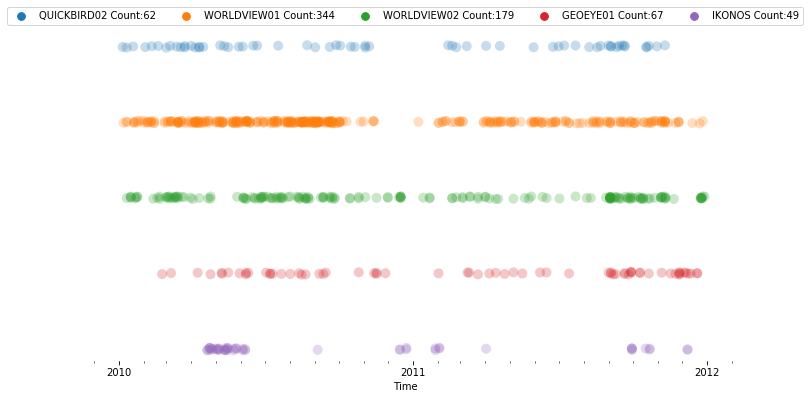

In [8]:
# Plot the results of our image search
# Legend shows counts of imagery found by sensor, dots show coverage over time 
st.searchPlot()

In [9]:
# TODO: what does coverage look like on a map? 

In [12]:
# How can we use the count results from the plot?
# Lets say we have an AOI that we estimate to be around 10 km2. WE know we want as much WV2 imagery
# from 2010-2012 as we can get 
st.km2_to_gb(10 * 179)
# looking at table below, we see WV2 Pan is ~31 GB and WV2 MS is ~15 GB 

,Sensor,Resolution (m),Band Count,GB
0,GE01_Pan,0.41,1,39.6685
1,GE01_MS,1.64,4,9.91712
2,WV01_Pan,0.50,1,26.6731
3,WV02_Pan,0.46,1,31.5136
4,WV02_MS,1.85,8,15.5869
5,WV03_Pan,0.31,1,69.3889
6,WV03_MS,1.24,8,34.6944
7,WV03_SWIR,3.70,8,3.89672
8,WV04_Pan,0.31,1,69.3889
9,WV04_MS,1.24,4,17.3472
